## Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data overview

In [0]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
year_data = df.Year
print('Max year: {}'.format(year_data.max()))

Max year: 2020.0


In [8]:
max_entry = year_data.idxmax()
max_entry

5957

In [9]:
df.iloc[[max_entry]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [0]:
df.Year = df.Year.replace(2020.0, 2009.0)

In [0]:
# method 2
# df.loc[max_entry, 'Year'] = 2009.0
# reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [0]:
publishers = df.Publisher.unique()
platforms = df.Platform.unique()
genres = df.Genre.unique()

In [13]:
len(publishers), len(platforms), len(genres)

(579, 31, 12)

In [14]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [0]:
df_new = df.dropna()

## Plot total global sales over years

In [0]:
y = df.groupby(['Year'])['Global_Sales'].sum()

In [0]:
# x as year, because the series output index is year
x = y.index.astype(int)

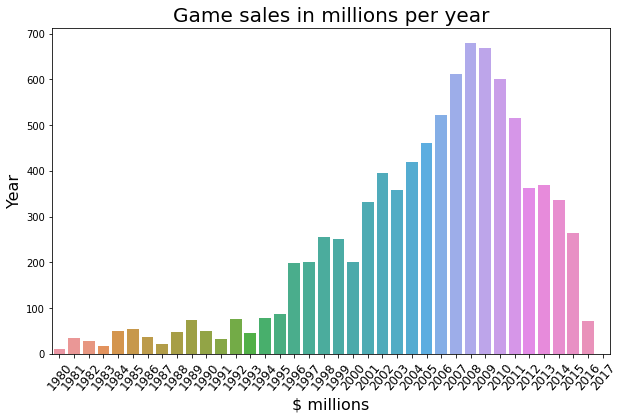

In [18]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x, y)
ax.set_xlabel('$ millions', fontsize=16)
ax.set_xticklabels(labels=x, fontsize=12, rotation=50)
ax.set_ylabel('Year', fontsize=16)
ax.set_title('Game sales in millions per year', fontsize=20)
plt.show()

## Plot total publish amounts per year

In [0]:
x = df.groupby(['Year'])['Publisher'].count()

In [0]:
y = x.index.astype(int)

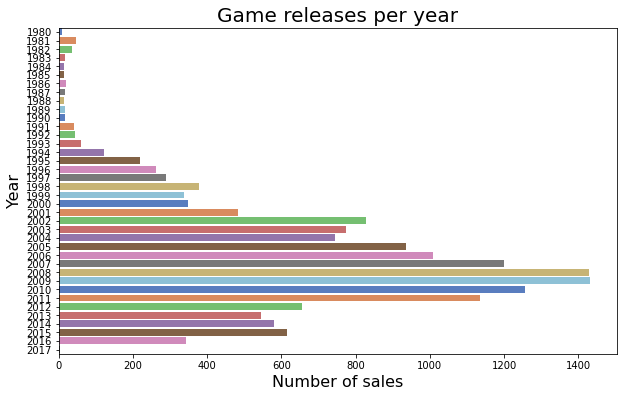

In [21]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('muted')
ax = sns.barplot(x, y, orient='h', palette=colors)
ax.set_xlabel('Number of sales', fontsize=16)
ax.set_ylabel('Year', fontsize=16)
ax.set_title('Game releases per year', fontsize=20)
plt.show()

## Plot the highest game publisher and its global revenue per year

In [0]:
table = df.pivot_table('Global_Sales', index='Publisher', columns='Year', aggfunc='sum')

In [0]:
publishers = table.idxmax()

In [0]:
# publisher is what you define before as index, so idxmax return not numbers but the publishers
sales = table.max()

In [0]:
years = table.columns.astype(int)
data = pd.concat([publishers, sales], axis=1)
data.columns = ['publisher', 'Global sales']

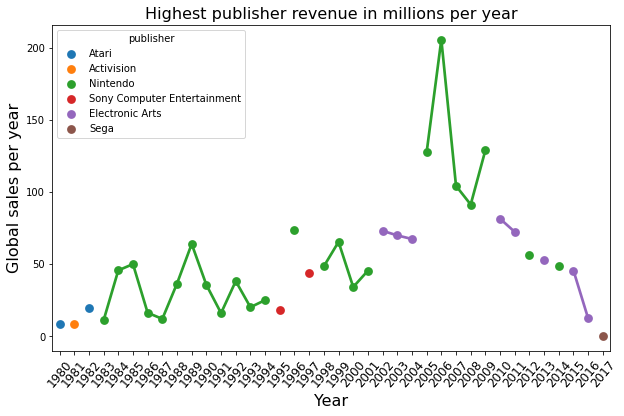

In [26]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x=years, y='Global sales', hue='publisher', data=data, size=15)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Global sales per year', fontsize=16)
ax.set_title('Highest publisher revenue in millions per year', fontsize=16)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
plt.show()

## Plot top 10 game publishers with the highest game releases

In [0]:
data = df.groupby(['Publisher']).count().iloc[:,0]

In [0]:
data = pd.DataFrame(data.sort_values(ascending=False)).iloc[0:10,:]

In [0]:
publishers = data.index
data.columns = ['Releases']

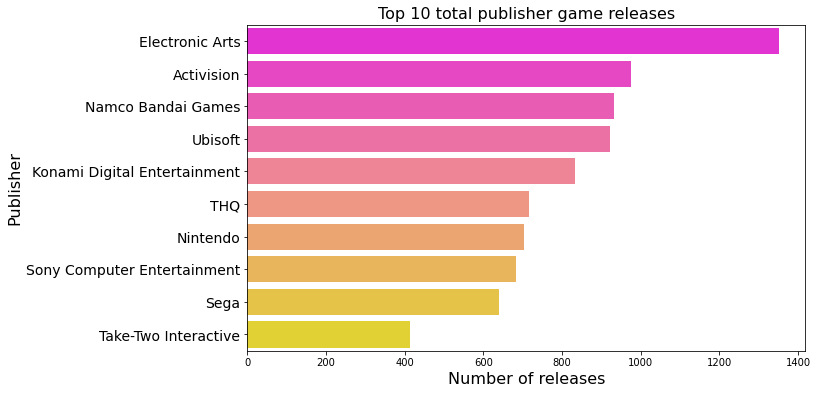

In [31]:
colors = sns.color_palette('spring', n_colors=len(data))
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Releases', y=publishers, data=data, orient='h', palette=colors)
ax.set_xlabel('Number of releases', fontsize=16)
ax.set_ylabel('Publisher', fontsize=16)
ax.set_title('Top 10 total publisher game releases', fontsize=16)
ax.set_yticklabels(labels=publishers, fontsize=14)
plt.show()

## Plot top 10 publishers with the highest global sales

In [0]:
data = df.groupby(['Publisher'])['Global_Sales'].sum()

In [0]:
data = data.sort_values(ascending=False)[:10]

In [0]:
y = data.index

In [0]:
data = pd.DataFrame(data)
data.columns = ['Global sales']

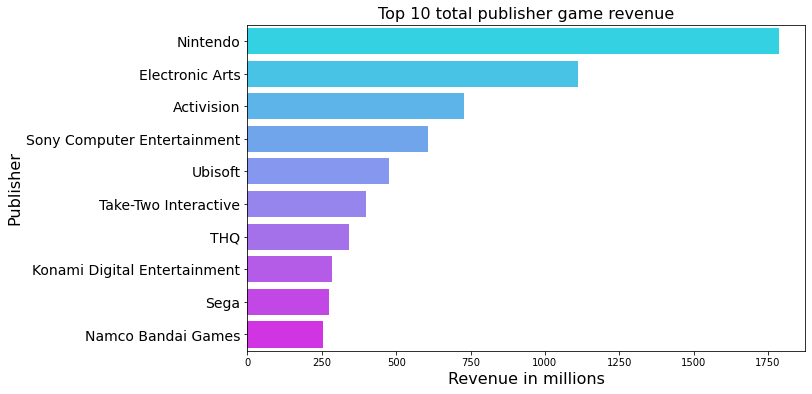

In [39]:
colors = sns.color_palette('cool', n_colors=len(data))
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Global sales', y=y, data=data, orient='h', palette=colors)
ax.set_xlabel('Revenue in millions', fontsize=16)
ax.set_ylabel('Publisher', fontsize=16)
ax.set_title('Top 10 total publisher game revenue', fontsize=16)
ax.set_yticklabels(labels=y, fontsize=14)
plt.show()